In [1]:
from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

import matplotlib.pyplot as plt
import numpy as np

from math import pi
from pathlib import Path

import pandas as pd

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.18-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
xls_setup

,Value
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold&apos;s Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.180000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=4, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
Influent 1,185.0,161.50,376,391.00,318.50,160.0
Influent 2,161.0,164.00,347,366.50,355.50,165.5
Influent 3,189.5,179.50,411,334.00,326.00,174.0
Influent AVG,178.5,168.33,378,363.83,333.33,166.5


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,30.000000,49.5,170.689655,825.000000,0.50,0.002801,13.70,0.081386,0.00,0.000000,51.25,0.140861,61.30,0.18390,0.00,0.000000
1,2,91.818182,151.5,522.413793,2525.000000,0.00,0.000000,20.50,0.121782,0.00,0.000000,84.00,0.230875,72.45,0.21735,41.35,0.248348
2,3,277.272727,457.5,1577.586207,7625.000000,11.35,0.063585,43.55,0.258713,10.36,0.027407,154.50,0.424645,99.95,0.29985,128.00,0.768769
3,4,775.454545,1279.5,4412.068966,21325.000000,19.15,0.107283,56.10,0.333267,34.05,0.090079,251.50,0.691251,127.50,0.38250,182.00,1.093093
4,5,1274.848485,2103.5,7253.448276,35058.333333,26.80,0.150140,86.75,0.515347,49.80,0.131746,275.00,0.755841,131.15,0.39345,194.50,1.168168
5,6,2325.757576,3837.5,13232.758621,63958.333333,34.25,0.191877,129.00,0.766337,41.75,0.110450,346.00,0.950985,185.50,0.55650,219.50,1.318318
6,7,2882.121212,4755.5,16398.275862,79258.333333,45.60,0.255462,118.50,0.703960,55.05,0.145635,358.50,0.985341,139.00,0.41700,173.00,1.039039
7,9,3403.333333,5615.5,19363.793103,93591.666667,43.75,0.245098,116.00,0.689109,63.00,0.166667,377.00,1.036189,164.00,0.49200,170.50,1.024024
8,10,3924.545455,6475.5,22329.310345,107925.000000,59.25,0.331933,131.00,0.778218,96.60,0.255556,392.50,1.078791,229.00,0.68700,176.50,1.060060
9,12,4966.969697,8195.5,28260.344828,136591.666667,70.05,0.392437,111.00,0.659406,100.05,0.264683,376.00,1.033440,259.00,0.77700,174.50,1.048048


In [6]:
setup = xls_setup.to_dict()["Value"]

In [7]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

In [8]:
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,30.000000,49.5,170.689655,825.000000,0.50,0.002801,13.70,0.081386,0.00,0.000000,51.25,0.140861,61.30,0.18390,0.00,0.000000
1,2,91.818182,151.5,522.413793,2525.000000,0.00,0.000000,20.50,0.121782,0.00,0.000000,84.00,0.230875,72.45,0.21735,41.35,0.248348
2,3,277.272727,457.5,1577.586207,7625.000000,11.35,0.063585,43.55,0.258713,10.36,0.027407,154.50,0.424645,99.95,0.29985,128.00,0.768769
3,4,775.454545,1279.5,4412.068966,21325.000000,19.15,0.107283,56.10,0.333267,34.05,0.090079,251.50,0.691251,127.50,0.38250,182.00,1.093093
4,5,1274.848485,2103.5,7253.448276,35058.333333,26.80,0.150140,86.75,0.515347,49.80,0.131746,275.00,0.755841,131.15,0.39345,194.50,1.168168
5,6,2325.757576,3837.5,13232.758621,63958.333333,34.25,0.191877,129.00,0.766337,41.75,0.110450,346.00,0.950985,185.50,0.55650,219.50,1.318318
6,7,2882.121212,4755.5,16398.275862,79258.333333,45.60,0.255462,118.50,0.703960,55.05,0.145635,358.50,0.985341,139.00,0.41700,173.00,1.039039
7,9,3403.333333,5615.5,19363.793103,93591.666667,43.75,0.245098,116.00,0.689109,63.00,0.166667,377.00,1.036189,164.00,0.49200,170.50,1.024024
8,10,3924.545455,6475.5,22329.310345,107925.000000,59.25,0.331933,131.00,0.778218,96.60,0.255556,392.50,1.078791,229.00,0.68700,176.50,1.060060
9,12,4966.969697,8195.5,28260.344828,136591.666667,70.05,0.392437,111.00,0.659406,100.05,0.264683,376.00,1.033440,259.00,0.77700,174.50,1.048048


In [9]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.loc["Influent AVG"][contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 0.778
   BEZ: 1.006
 PFHxA: 0.536
   DCF: 1.126
  PFOA: 0.431
 PFHxS: 0.945


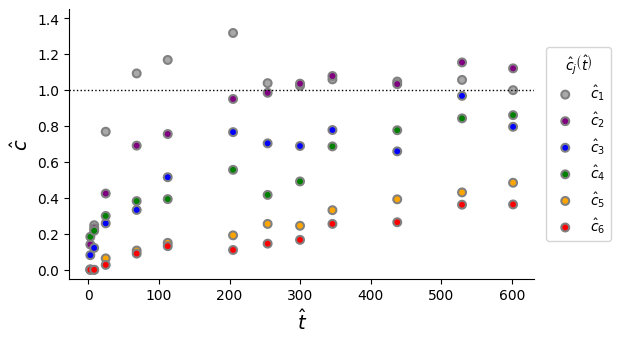

In [10]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

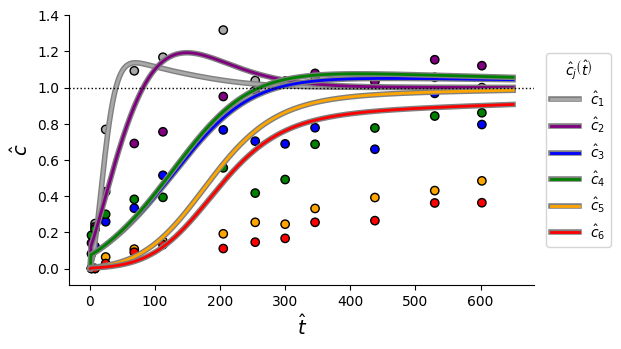

In [11]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=2.6e2,  # nmol/cm³
    k_ads=(50, 25, 30, 30, 60, 70),  # 1/min
    k_des=(2, 0.4, 0.02, 0.025, 0.015, 0.01),  # 1/min
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

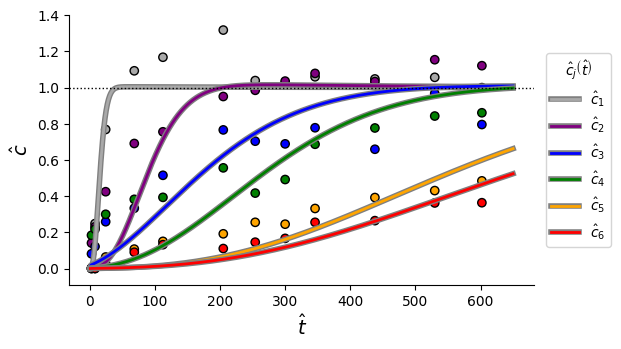

In [12]:
# Fitting data to model - Manually tweaking parameters

optimal_parameter_set = [
    6.41e03,
    *(9.13e01, 9.41e01, 4.65e01, 7.29e01, 9.67e01, 9.17e01),
    *(5.96e00, 1.01e00, 2.37e-01, 2.45e-01, 1.54e-01, 1.22e-01),
]


p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

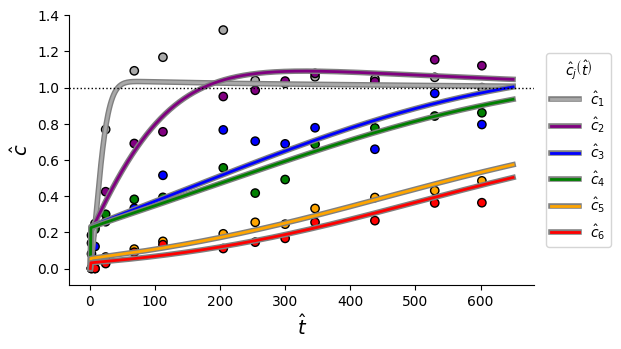

In [13]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    2.85e00,
    *(1.639e00, 1.267e00, 1.224e00, 1.232e00, 1.522e00, 1.602e00),
    *(4.111e-01, -6.239e-01, -1.750e00, -1.918e00, -2.681e00, -2.726e00),
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

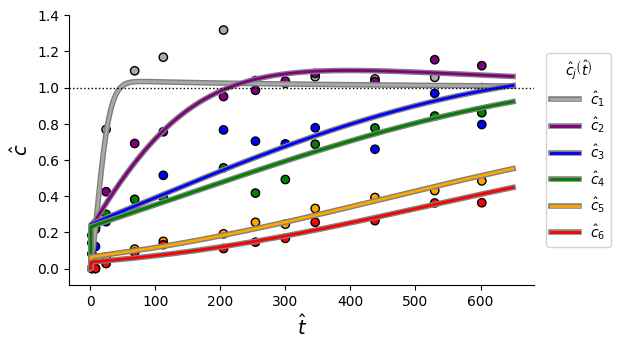

In [14]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    2.877745e00,
    1.627495e00,
    1.234059e00,
    1.207910e00,
    1.225153e00,
    1.501264e00,
    1.586990e00,
    3.727068e-01,
    -7.621601e-01,
    -1.664031e00,
    -1.870317e00,
    -2.568974e00,
    -2.840743e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.2
sim.solve()

display(plot_btc_and_data(sim, experimental_data))


In [15]:
display(p)

PhysicalParams(L=0.85, v=9.645754126781533, n=0.5, sm=754.6489984538713, k_ads=array([42.4126101 , 17.14190169, 16.14024044, 16.79395557, 31.71494773,
       38.63580807]), k_des=array([2.35888517e+00, 1.72917879e-01, 2.16754938e-02, 1.34797861e-02,
       2.69790094e-03, 1.44296900e-03]), C_0=array([0.77789198, 1.00561083, 0.53599745, 1.12573455, 0.4310553 ,
       0.9447402 ]))

In [16]:
for k, v in p.nondim.items():
    print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")

Dam_ads: 3.737E+00, 1.511E+00, 1.422E+00, 1.480E+00, 2.795E+00, 3.405E+00
Dam_des: 2.079E-01, 1.524E-02, 1.910E-03, 1.188E-03, 2.377E-04, 1.272E-04
kappa: 5.154E-04, 6.663E-04, 3.551E-04, 7.459E-04, 2.856E-04, 6.259E-04
bc: 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00


In [17]:
len(sim.btc[0])

3250